# **2020 Election Linear Regression**
**@Ethan Soroko**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix

counties_df = pd.read_csv('US_Election_Counties_Dataset.csv')
states_df = pd.read_csv('US_Election_States_Dataset.csv')

pd.set_option('display.max_columns', None)

# **Linear Regression for Counties**

In [2]:
X_counties = counties_df.iloc[:, 10:-1]
y_counties = counties_df.iloc[:, -1]

X_counties.head()

,Population with less than 9th grade education,"Population with 9th to 12th grade education, no diploma",High School graduate and equivalent,"Some College,No Degree",Associates Degree,Bachelors Degree,Graduate or professional degree,Gini Index,Median income (dollars),Mean income (dollars),Area in square Km,Density per square km,Total Population,Hispanic or Latino percentage,NH-White percentage,NH-Black percentage,NH-American Indian and Alaska Native percentage,NH-Asian percentage,NH-Native Hawaiian and Other Pacific Islander percentage,NH-Some Other Race percentage,NH-Two or More Races percentage,"Percentage engaged in Management, business, science, and arts occupations",Percentage engaged in Service Occupations,Percentage engaged in Sales and Office,Percentage engaged in Resources and Construction,Percentage engaged in Transportation
0,1.7,7.9,31.1,21.0,8.7,16.7,12.8,0.4541,68315.0,90372,1539.63,38.17,58805,3.60,70.71,19.30,0.31,1.48,0.04,0.31,4.23,36.39,14.24,22.02,9.99,17.36
1,2.0,6.4,27.8,21.7,9.6,20.0,12.5,0.4648,71039.0,96027,4117.73,56.69,231767,5.47,80.47,7.77,0.56,0.88,0.05,0.33,4.47,35.62,17.14,24.20,9.91,13.13
2,7.3,16.2,36.8,19.9,7.9,6.6,5.3,0.5098,39712.0,60128,2292.16,10.85,25223,5.99,43.95,46.98,0.23,0.41,0.00,0.25,2.19,27.73,20.16,19.49,12.53,20.09
3,6.4,14.7,40.9,19.1,8.0,6.6,4.3,0.4553,50669.0,65131,1612.19,13.80,22293,3.32,73.75,19.69,0.17,0.12,0.04,0.21,2.69,22.22,15.32,20.57,16.43,25.47
4,7.1,11.1,35.3,20.7,11.0,9.4,5.3,0.4475,57440.0,75954,1670.26,35.37,59134,9.76,84.15,1.40,0.32,0.29,0.02,0.17,3.89,26.75,12.98,22.73,15.81,21.73


# **Training County Model**

In [3]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_counties, y_counties, test_size=0.2, random_state=1, stratify=y_counties)

county_model = LinearRegression()
county_model.fit(X_train_c, y_train_c)

print("Coefficients:", county_model.coef_)
print()
print("Intercept:", county_model.intercept_)

Coefficients: [ 3.91858150e-02  2.84769697e-02  4.13459009e-02  3.28375780e-02
  4.33603517e-02  5.12907189e-02  6.84682233e-02  1.37458935e-01
 -3.71568013e-07 -2.01051885e-06  7.87005875e-07 -5.64286777e-06
  1.14921227e-07  7.68490769e-02  7.17631966e-02  8.24622079e-02
  8.19415883e-02  8.64236352e-02  9.00515621e-02  1.70575906e-01
  6.91678308e-02 -7.07614999e-01 -6.98067260e-01 -7.09203129e-01
 -7.05361428e-01 -7.03478214e-01]

Intercept: 59.19374345896331


# **Results for County Model**

In [4]:
y_pred = county_model.predict(X_train_c)

# SSE (Sum of Squared Error)
sse = np.sum((y_train_c - y_pred) ** 2)

# RMSE (Root Mean Squared Error)
rmse = root_mean_squared_error(y_train_c, y_pred)

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_train_c, y_pred)

# R^2
r2 = r2_score(y_train_c, y_pred)

# Print results
print("Results for County Model")
print(f"SSE: {sse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

Results for County Model
SSE: 181.94845784447193
RMSE: 0.2690243264904207
MAE: 0.1947210593976338
R^2: 0.502308370303997


# **Calculating County Confusion Matrix**

In [5]:
y_pred = county_model.predict(X_test_c)

# Convert continuous predictions to binary (classification threshold = 0.5)
y_pred_binary = (y_pred >= 0.5).astype(int)

county_confusion_matrix = confusion_matrix(y_test_c, y_pred_binary)

TN = county_confusion_matrix[0, 0]
FP = county_confusion_matrix[0, 1]
FN = county_confusion_matrix[1, 0]
TP = county_confusion_matrix[1, 1]

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

print()

accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"General Accuracy: {accuracy}")

if (TP + FP) != 0:
  precision = TP / (TP + FP)
  print(f"Precision: {precision}")
else:
  print("Precision: Division by zero")

if (TP + FN) != 0:
  recall = TP / (TP + FN)
  print(f"Recall: {recall}")
else:
  print("Recall: Division by zero")

True Positives (TP): 58
False Positives (FP): 9
True Negatives (TN): 509
False Negatives (FN): 53

General Accuracy: 0.9014308426073132
Precision: 0.8656716417910447
Recall: 0.5225225225225225


# **Plotting Graph of Results**

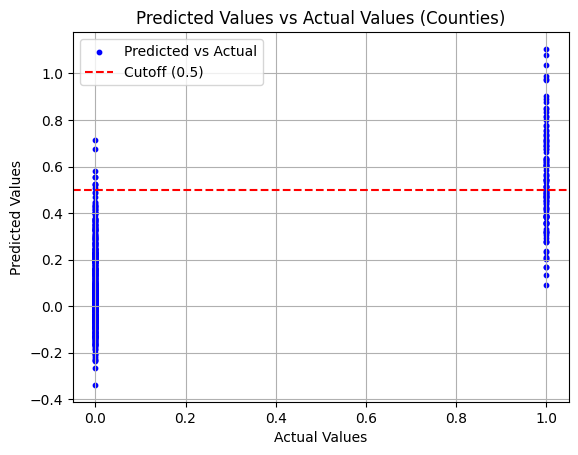

In [6]:
plt.scatter(y_test_c, y_pred, color='blue', s=10, marker ='o', label='Predicted vs Actual')
plt.axhline(y=0.5, color='red', linestyle='--', label='Cutoff (0.5)')
plt.title("Predicted Values vs Actual Values (Counties)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# **Linear Regression for States**

In [7]:
X_states = states_df.iloc[:, 10:-7]
y_states = states_df.iloc[:, -1]

X_states.head()

,Associates Degree,Bachelors Degree,Graduate or professional degree,Gini Index,Mean income (dollars),Median income (dollars),Area in square Km,Hispanic or Latino percentage,NH-White percentage,NH-Black percentage,NH-American Indian and Alaska Native percentage,NH-Asian percentage,NH-Native Hawaiian and Other Pacific Islander percentage,NH-Some Other Race percentage,NH-Two or More Races percentage,"Percentage engaged in Management, business, science, and arts occupations",Percentage engaged in Service Occupations,Percentage engaged in Sales and Office,Percentage engaged in Resources and Construction,Percentage engaged in Transportation
0,8.92,16.75,10.58,0.4673,70621.25,51690.19,131185.10,5.26,63.12,25.64,0.46,1.51,0.05,0.29,3.67,36.03,15.93,20.67,9.76,17.60
1,8.89,19.13,11.41,0.4105,94283.27,76687.50,1479016.90,6.79,57.51,2.83,14.84,5.93,1.70,0.62,9.78,38.64,18.04,19.59,11.56,12.17
2,9.11,19.70,12.23,0.4495,77329.40,59725.53,294366.12,30.65,53.37,4.44,3.69,3.48,0.20,0.44,3.73,38.98,17.93,22.86,9.15,11.08
3,7.82,15.73,9.19,0.4618,67296.48,49542.33,134660.48,8.53,68.52,14.94,0.68,1.70,0.47,0.27,4.89,35.20,16.47,20.50,10.28,17.54
4,7.99,21.88,13.58,0.4630,112918.57,82966.60,403673.31,39.40,34.69,5.36,0.39,15.12,0.35,0.57,4.12,41.15,17.70,19.99,9.04,12.13


# **Training State Model**


In [8]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_states, y_states, test_size=0.2, random_state=1, stratify=y_states)

state_model = LinearRegression()
state_model.fit(X_train_s, y_train_s)

print("Coefficients:", county_model.coef_)
print()
print("Intercept:", county_model.intercept_)

Coefficients: [ 3.91858150e-02  2.84769697e-02  4.13459009e-02  3.28375780e-02
  4.33603517e-02  5.12907189e-02  6.84682233e-02  1.37458935e-01
 -3.71568013e-07 -2.01051885e-06  7.87005875e-07 -5.64286777e-06
  1.14921227e-07  7.68490769e-02  7.17631966e-02  8.24622079e-02
  8.19415883e-02  8.64236352e-02  9.00515621e-02  1.70575906e-01
  6.91678308e-02 -7.07614999e-01 -6.98067260e-01 -7.09203129e-01
 -7.05361428e-01 -7.03478214e-01]

Intercept: 59.19374345896331


# **Results for State Model**

In [9]:
y_pred = state_model.predict(X_train_s)

# SSE (Sum of Squared Error)
sse = np.sum((y_train_s - y_pred) ** 2)

# RMSE (Root Mean Squared Error)
rmse = root_mean_squared_error(y_train_s, y_pred)

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_train_s, y_pred)

# R^2
r2 = r2_score(y_train_s, y_pred)

# Print results
print("Results for County Model")
print(f"SSE: {sse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

Results for County Model
SSE: 2.221075865196739
RMSE: 0.23564145779110787
MAE: 0.18935569275259923
R^2: 0.7778924134803261


# **Calculating State Confusion Matrix**

In [10]:
y_pred = state_model.predict(X_test_s)

# Convert continuous predictions to binary (classification threshold = 0.5)
y_pred_binary = (y_pred >= 0.5).astype(int)

county_confusion_matrix = confusion_matrix(y_test_s, y_pred_binary)

TN = county_confusion_matrix[0, 0]
FP = county_confusion_matrix[0, 1]
FN = county_confusion_matrix[1, 0]
TP = county_confusion_matrix[1, 1]

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

print()

accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"General Accuracy: {accuracy}")

if (TP + FP) != 0:
  precision = TP / (TP + FP)
  print(f"Precision: {precision}")
else:
  print("Precision: Division by zero")

if (TP + FN) != 0:
  recall = TP / (TP + FN)
  print(f"Recall: {recall}")
else:
  print("Recall: Division by zero")

True Positives (TP): 3
False Positives (FP): 0
True Negatives (TN): 5
False Negatives (FN): 3

General Accuracy: 0.7272727272727273
Precision: 1.0
Recall: 0.5


# **Plotting Graph of Results**

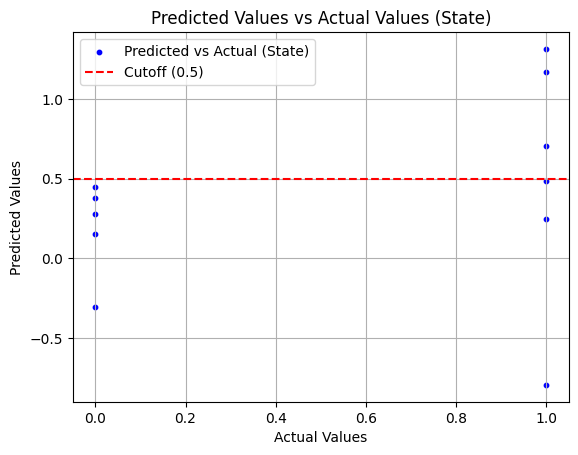

In [11]:
plt.scatter(y_test_s, y_pred, color='blue', s=10, marker ='o', label='Predicted vs Actual (State)')
plt.axhline(y=0.5, color='red', linestyle='--', label='Cutoff (0.5)')
plt.title("Predicted Values vs Actual Values (State)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
states_df["Prediction"] = (state_model.predict(X_states) > 0.5).astype(int)
states_df
states_df.to_csv('States_With_Predictions.csv')